In [1]:
### 1 Multi-class Classification ###
"""
We will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9).
"""
import scipy.io # to load .mat file
import numpy.random # to randomly select data points
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
### 1.1 Dataset ###
file_location = 'ex3/ex3data1.mat'
data = scipy.io.loadmat(file_location)
X, y = data['X'], data['y']
print("X's shape is", X.shape)
print("y's shape is", y.shape)
np.unique(y)

X's shape is (5000, 400)
y's shape is (5000, 1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

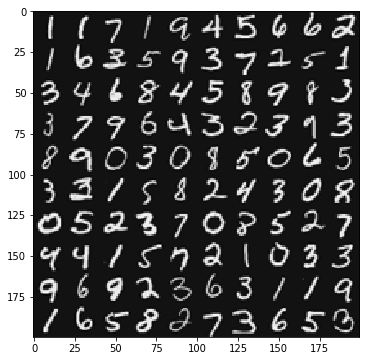

In [3]:
### 1.2 Visualizing the data ###
def displayData(X):
    """
    displays 2D data stored in X in a nice grid
    """
    m = X.shape[0]
    rand_indices = numpy.random.permutation(m) # Randomly select 100 data points to display
    sel = X[rand_indices[:100], :]
    
    plt.figure(figsize=(6,6))
    img = np.zeros((1,20*10)) # prevent np.append's ValueError: arrays must have same number of dimensions
    for i in range(10):
        x = sel[i*10:(i+1)*10,:].reshape(20*10,20).T
        img = np.append(img, x, axis=0)

    img = img[1:,:] # choose what we need
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()
    
displayData(X)    

In [4]:
### 1.3 Vectorizing Logistic Regression ###
"""
We use multiple one-vs-all logistic regression models to build a multi-class classifier.
Because there are 10 classes, we will need to train 10 separate logistic regression classifiers.
"""
X = np.insert(X, 0, 1, axis=1)
print("X's shape is", X.shape)
print("y's shape is", y.shape)

X's shape is (5000, 401)
y's shape is (5000, 1)


In [5]:
### 1.3.3 Vectorizing regularized logistic regression ###
def sigmoid(z):
    return 1/(1+np.exp(-z))

def costFunction(theta, X, y, _lambda): # theta must be put in the first position of argument, for 'optimizer' below
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    J = -float((np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)))/m + _lambda*np.sum(theta[1:]**2)/(2*m)  # vectorization version is better  
    return J

def gradientDescent(theta, X, y, _lambda):
    m = y.shape[0]
    h = sigmoid(X.dot(theta))
    grad = X.T.dot(h-y)/m
    grad[1:] += (_lambda/m) * theta[1:] 
    return grad

In [6]:
### 1.4 One-vs-all Classification ###
def optimizer(theta, X, y, _lambda):  # theta must be put in the first position of argument
    """
    We used optimize.fmin as our optimizer in ex2. 
    Here we choose optimize.fmin_cg because optimize.fmin fails
    """
    res = optimize.fmin_cg(costFunction, x0=theta, fprime=gradientDescent, args=(X, y, _lambda),
                        maxiter=100, full_output=True, disp=False)
    return res[0] # res[0]:Parameter that minimizes function = theta

def oneVsAll(X, y, num_labels, _lambda):
    """
    train num_labels logistic regression classifiers and returns each of these classifiers in a matrix all_theta, 
    where the i-th row of all_theta corresponds to the classifier for label i
    """
    #X = np.insert(X, 0, 1, axis=1) # Add ones to the X data matrix
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n)) # shape:(10,401)
    initial_theta = np.zeros((n,1))
    for i in range(num_labels):
        print('Optimizing the theta of handwritten number {}...'.format(i))
        label = i if i else 10
        yBoolVec = np.array([1 if e == label else 0 for e in y])
        temp = optimizer(initial_theta, X, yBoolVec, _lambda)
        all_theta[i,:] = temp.T
    print('Done!')
    return all_theta # shape:(10,401)

In [7]:
num_labels= 10
_lambda = 0.1
all_theta = oneVsAll(X, y, num_labels, _lambda)

Optimizing the theta of handwritten number 0...
Optimizing the theta of handwritten number 1...
Optimizing the theta of handwritten number 2...
Optimizing the theta of handwritten number 3...
Optimizing the theta of handwritten number 4...
Optimizing the theta of handwritten number 5...
Optimizing the theta of handwritten number 6...
Optimizing the theta of handwritten number 7...
Optimizing the theta of handwritten number 8...
Optimizing the theta of handwritten number 9...
Done!


In [8]:
### 1.4.1 One-vs-all Prediction ###
def predictOneVsAll(all_theta, X):
    """
    Return a predict matrix of shape (5000,1) where entries are from 1 to 10. Its form just as the same as y.
    """
    m = X.shape[0]
    h = 1./(1.+np.exp(-X.dot(all_theta.T))) # shape:(5000,401)x(401,10)=(5000,10)
    p = np.c_[np.argmax(h, axis=1)] # shape:(5000,1)
    for i,e in enumerate(p):
        if e==0:
            p[i] = 10
    return p # shape:(5000,1)

In [9]:
p = predictOneVsAll(all_theta, X)
acc = np.mean(p==y)*100 
print('training set accuracy is {:.1f}%'.format(acc))

training set accuracy is 96.2%


In [10]:
### 2 Neural Networks ###
"""
The neural network will be able to represent complex models that form non-linear hypotheses.
We will implement a neural network to recognize handwritten digits using the same training set above.
Our goal is to implement the feedforward propagation algorithm to use our weights for prediction.
"""
input_layer_size  = 400 # 20x20 Input Images of Digits
hidden_layer_size = 25 # 25 hidden units
num_labels = 10

file_location = 'ex3/ex3data1.mat'
data = scipy.io.loadmat(file_location)
X, y = data['X'], data['y']
print("X's shape is", X.shape)
print("y's shape is", y.shape)
np.unique(y)

X's shape is (5000, 400)
y's shape is (5000, 1)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [11]:
### 2.1 Model representation ###
file_location = 'ex3/ex3weights.mat'
data = scipy.io.loadmat(file_location)
Theta1, Theta2 = data['Theta1'], data['Theta2']
print("Theta1's shape is", Theta1.shape)
print("Theta2's shape is", Theta2.shape)

Theta1's shape is (25, 401)
Theta2's shape is (10, 26)


In [12]:
### 2.2 Feedforward Propagation and Prediction ###
def predict(Theta1, Theta2, X):
    """
    There are 3 layers in total. One input layer, one hidden layer and one output layer.
    We will implement feedforward propagation for this 3-layer neural network,
    and tranform a3 of shape (5000,10) into p of shape (5000,1) at the end.
    """
    # feedforward propagation
    a1 = np.insert(X, 0, 1, axis=1)  # shape:(5000,401)
    a2 = sigmoid(a1.dot(Theta1.T))   # shape:(5000,401) x (401,25) = (5000,25)
    a2 = np.insert(a2, 0, 1, axis=1) # shape:(5000,26)
    a3 = sigmoid(a2.dot(Theta2.T))   # shape:(5000,26) x (26,10) = (5000,10)
    p = np.c_[np.argmax(a3, axis=1)] # shape:(5000,1)
    
    # the order of labels here is 1,2,....,10, while the order of labels above is 10,1,2,....,9
    for i,_ in enumerate(p):         
        p[i] += 1 
    return p # shape:(5000,1)

In [13]:
p = predict(Theta1, Theta2, X)
acc = np.mean(p==y)*100 
print('training set accuracy is {:.1f}%'.format(acc))

training set accuracy is 97.5%


prediction is 1
true value is 1


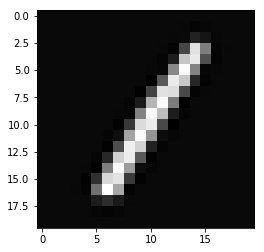

In [14]:
# control+enter many times to check it out
m = X.shape[0]
rand_indices = numpy.random.permutation(m) # Randomly select data point to display
sel = X[rand_indices[:1], :]
img = sel.reshape((20,20)).T
plt.imshow(img, cmap=plt.cm.gray)
pred = int(p[rand_indices[:1]])
true = int(y[rand_indices[:1]])

# label 10 represent number 0
if pred == 10:
    pred = 0
if true == 10:
    true = 0
print('prediction is {}\ntrue value is {}'.format(pred,true))